# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [50]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


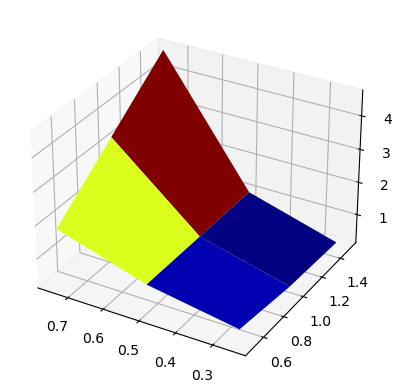

In [52]:
model=HouseholdSpecializationModelClass()
HFHM=np.zeros([3,3])
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1,1.5]
for it, alpha in enumerate(alpha_list):
    for jt, sigma in enumerate(sigma_list):
        model.par.alpha=alpha
        model.par.sigma=sigma
        dsol=model.solve_discrete()
        opt=model.solve_discrete()
        HFHM[it,jt]=opt.HF/opt.HM

print(HFHM)
alpha_list,sigma_list = np.meshgrid(alpha_list,sigma_list,indexing='ij')



import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(alpha_list,sigma_list,HFHM,cmap=cm.jet)
ax.invert_xaxis()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(alpha_list,sigma_list,HFHM,cmap=cm.jet)
ax.invert_xaxis()

# Question 2

Explain your code and procedure

In [62]:
#Igen skal vi lave et loop hvor vi looper for forskellige værdier af WF. 
WF_list = [0.5,1,1.5]
HFHM=np.zeros([5,5])
for it, wF in enumerate(WF_list):
    model.par.wF=alpha
    dsol=model.solve_discrete()
    opt=model.solve_discrete()
    logHFHM[it]=np.log(opt.HF/opt.HM)

print(logHFHM)
#Problemet er nok at HFHM ikke bliver opdateret. Han sagde at vi skulle bruge np.zeros (eller faktisk helt præcist en tom celle)



TypeError: 'numpy.float64' object does not support item assignment

In [61]:
logHFHM


1.540445040947149

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.